In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

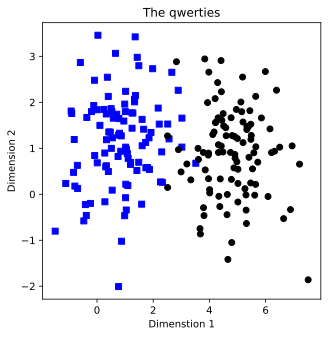

In [3]:
# create data

nPerCLuster = 100
blur = 1

A = [1,1]
B = [5,1]

a = [A[0]+ np.random.randn(nPerCLuster)*blur,A[1]+ np.random.randn(nPerCLuster)*blur]
b = [B[0]+ np.random.randn(nPerCLuster)*blur,B[1]+ np.random.randn(nPerCLuster)*blur]

# true label
labels_np = np.vstack((np.zeros((nPerCLuster,1)),np.ones((nPerCLuster,1))))
 # concatinate into a matrix
data_np = np.hstack((a,b)).T

# convert to pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# plot the data
fig= plt.subplots(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title("The qwerties")
plt.xlabel("Dimenstion 1")
plt.ylabel("Dimension 2")
plt.show()


In [5]:
# define class
class Class4ANN(nn.Module):
    def __init__(self):
        super().__init__()
        
        ### input layer
        self.inputL = nn.Linear(2,1)
        
        ### output layer
        self.outputL = nn.Linear(1,1)
    # forward pass
    def forward(self,x):
        
        x = self.inputL(x)
        
        # apply ReLU
        x = F.relu(x)
        
        # output layer
        x = self.outputL(x)
        x = torch.sigmoid(x)
        
        return x

ANNcls = Class4ANN()

In [6]:
# other model features
learningRate = .01

# loss function
lossFn = nn.BCELoss()

optimizer = torch.optim.SGD(ANNcls.parameters(), lr=learningRate)

In [13]:
# train model
num_epoche = 1000
losses = torch.zeros(num_epoche)

for epocheI in range(num_epoche):
    
    yHat = ANNcls.forward(data)
    
    loss = lossFn(yHat,labels)
    losses[epocheI] = loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

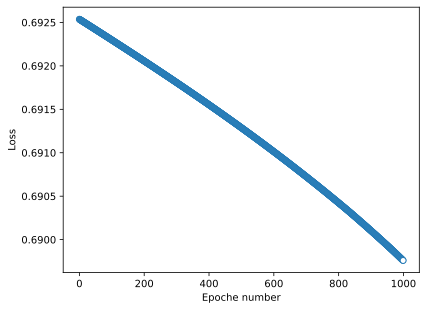

In [14]:
# show losses

plt.plot(losses.detach(),"o",markerfacecolor="w",linewidth=.1)
plt.xlabel("Epoche number")
plt.ylabel("Loss")
plt.show()